In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import base64

with open('dal.jpg', 'rb') as img:
    base64_string = base64.b64encode(img.read())
print(base64_string)

b'/9j/4AAQSkZJRgABAgAAZABkAAD/7ABBRHVja3kAAQAEAAAAPAACACwAAAAUAFMAQQBOAFkATwAgAEQASQBHAEkAVABBAEwAIABDAEEATQBFAFIAQQAA/+4ADkFkb2JlAGTAAAAAAf/bAIQABgQEBAUEBgUFBgkGBQYJCwgGBggLDAoKCwoKDBAMDAwMDAwQDA4PEA8ODBMTFBQTExwbGxscHx8fHx8fHx8fHwEHBwcNDA0YEBAYGhURFRofHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8f/8AAEQgA8AFAAwERAAIRAQMRAf/EAK4AAAEFAQEBAAAAAAAAAAAAAAUCAwQGBwEACAEAAgMBAQAAAAAAAAAAAAAAAQMAAgQFBhAAAgEDAwIEAwYEAwUGBAcAAQIDEQQFACESMQZBUSITYXEHgZEyQiMUobFSFcHRM+FiciQI8IKiQ1M0krJjFvHSg0QlJhcRAAICAQQBAwMCBQQCAgMBAAABEQIDITESBEFRIgVhMhNxkfCBobFCwdHhFPEjUhViMwZD/9oADAMBAAIRAxEAPwDSMHjJsnde2BSJBWV2Hh5a5GDDy1ex0c2XgvqXqO3htLYRwRgLEPQnTXQiNjkWs7OWREu5pD7ftMJGJoPL46EMjRLjtbpV9TKX8a+GokwQSVWQJxoCPE10dSCo3VV401JJAmUB/T089SSDvBKAAV1CCZrW2aP1RIxO26g6MhTaB8/beImFGt1Dt4r6TpdsdHukMrnuvJDm7KsAaRTSKfI7jSX08foPXcv5Ic3ZMm/CZWHhUU0m3Rr4Y1d31QLl7Uyiv+kCw81NR/HWe3Rv41H17dHuR5sLl7cVkgLD5f5aXfp5K+BlexR+SHLbSD/Wt2+YGkvFZboYrrwyM9tEN+bR/Oo1R1jwXVhP7cGvC4r9oOl6Bk8ttdDpKG+zVoJIql2vVVb5baEsmh4yyru0Rp

In [1]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## yolo 로드

In [3]:
net = cv2.dnn.readNet("yolov4_19000.weights", "yolov4.cfg")
classes = []
with open("food30.names", "rt",encoding = "UTF8") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


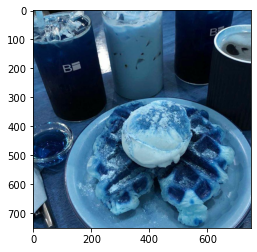

In [4]:
img = cv2.imread("waflle.jpg")
plt.imshow(img)
plt.show() #파랗게 보이는 이유 : plt 과 cv2 의 색공간이 다름

In [5]:
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

## Detecting objects

In [6]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=True)     # 네트워크에 넣기 위한 전처리

net.setInput(blob)  # 전처리된 blob 네트워크에 입력
outs = net.forward(output_layers)     # 결과 받아오기

## show img

In [7]:
class_ids = []
confidences = []

boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        if scores[class_id] != 0:
            print(class_id)
            print(scores[class_id])
        confidence = scores[class_id]
        if confidence > 0.2: # 임계값 설정
            # 탐지된 객체의 너비, 높이 및 중앙 좌표값 찾기
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            #print(center_x,center_y)
            w = abs(int(detection[2] * width))
            h = abs(int(detection[3] * height))
            #print(w,h)
             # 객체의 사각형 테두리 중 좌상단 좌표값 찾기
            x = abs(int(center_x - w / 2))
            y = abs(int(center_y - h / 2))
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

16
0.42376432
16
0.30799684
16
0.92614555
16
0.88367546
16
0.7657309
16
0.70962125


In [8]:
#indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)    # Non Maximum Suppression (겹쳐있는 박스 중 confidence 가 가장 높은 박스를 선택)
#같은 index 중 확률이 가장 높은것



## bounding box 가 겹쳐도 여러개 검출 할 수 있도록 설정
class_list = list(set(class_ids))
idxx = []
indexes=[]
for i in range(len(class_list)):
    max_v=0
    for j in range(len(class_ids)):
        if class_ids[j] == class_list[i]:
            if max_v < confidences[j]:
                max_v = confidences[j]
                idxx.append(j)
    indexes.append(idxx[len(idxx)-1])            
                
print(class_ids)







[16, 16, 16, 16, 16, 16]


와플
0.9261455535888672
89 280 752 733
0.11866666666666667 0.37333333333333335 1 0.9773333333333334


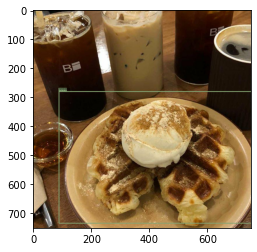

['와플 [89, 280, 663, 453]']


In [9]:
font = cv2.FONT_HERSHEY_PLAIN
det_foods = []
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        class_name = classes[class_ids[i]]
        print(class_name)
        print(confidences[i])
        label = f"{class_name} {boxes[i]}"
        det_foods.append(label)
        color = colors[i]
        print(x,y,x+w,y+h)
        # 사각형 테두리 그리기 및 텍스트 쓰기
        nx = (x + w) / width
        ny = (y + h) / height

        if nx > 1:
            nx = 1
        if ny > 1:
            ny =1
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2) #상하좌
        print(x/width,y/height,nx,ny)
        cv2.rectangle(img, (x - 1, y), (x + len(class_name)*13, y-12), color, -1)
        cv2.putText(img, class_name, (x, y - 4), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0, 0, 0), 1,cv2.LINE_AA)
            
b,g,r = cv2.split(img)
image2 = cv2.merge([r,g,b])
plt.imshow(image2)
#imShow(img)
plt.show()
print(det_foods)

In [10]:
for i in range(len(det_foods)):
    idx = det_foods[i].find("[")
    print(det_foods[i][0:idx])
    fname=det_foods[i][0:idx].strip()
    

와플 
